In [1]:
get_ipython().system('pip install spacy')

In [2]:
get_ipython().system('pip install wordcloud')

In [3]:
import pandas as pd
import numpy as np
import string
import spacy
import matplotlib.pyplot as plt
import seaborn as sns
import nltk
from wordcloud import WordCloud
get_ipython().run_line_magic('matplotlib', 'inline')
from matplotlib import pyplot as plt
import re
from nltk.corpus import stopwords
from nltk.stem.porter import PorterStemmer
from nltk.stem import WordNetLemmatizer
from sklearn.model_selection import train_test_split


In [4]:
data=pd.read_csv("D:/ASSIGNMENTS/A11 Text Mining/Elon_musk.csv",sep=",",encoding="latin-1")

In [5]:
data

,Unnamed: 0,Text
0,1,@kunalb11 Im an alien
1,2,@ID_AA_Carmack Ray tracing on Cyberpunk with H...
2,3,@joerogan @Spotify Great interview!
3,4,@gtera27 Doge is underestimated
4,5,@teslacn Congratulations Tesla China for amazi...
...,...,...
1994,1995,"@flcnhvy True, it sounds so surreal, but the n..."
1995,1996,@PPathole Make sure to read ur terms &amp; con...
1996,1997,@TeslaGong @PPathole Samwise Gamgee
1997,1998,@PPathole Altho Dumb and Dumber is <U+0001F525...


In [6]:
train,test=train_test_split(data,test_size=0.1)

In [7]:
train

,Unnamed: 0,Text
337,338,"@PPathole Dojo isnt needed, but will make sel..."
663,664,@ICannot_Enough @Erdayastronaut @rweb11742 Pre...
1746,1747,@slashdot !
258,259,@Tesmanian_com As promised
504,505,@wonderofscience Near-orbital space is the fas...
...,...,...
1716,1717,@Neuro_Skeptic Will show neurons firing in rea...
1819,1820,Tesla solar panels are $1.49/Watt \nhttps://t....
254,255,https://t.co/ho7yGXAS3a
665,666,@LUGG4S1 @pcgamer About 2 secs after starting ...


In [8]:
import re

In [9]:
def cleantext(text):
    text = re.sub(r"@[A-Za-z0-9]+", "", text) # Remove Mentions
    text = re.sub(r"#", "", text) # Remove Hashtags Symbol
    text = re.sub(r"RT[\s]+", "", text) # Remove Retweets
    text = re.sub(r"https?:\/\/\S+", "", text) # Remove The Hyper Link
    
    return text

In [10]:
data["Text"] = data["Text"].apply(cleantext)
data.head()

,Unnamed: 0,Text
0,1,Im an alien
1,2,_AA_Carmack Ray tracing on Cyberpunk with HDR ...
2,3,Great interview!
3,4,Doge is underestimated
4,5,Congratulations Tesla China for amazing execu...


In [11]:
import nltk
from nltk.corpus import stopwords
from nltk.tokenize import  word_tokenize

In [12]:
import spacy
spacy.load('en_core_web_sm')

In [13]:
from textblob import TextBlob

In [14]:
def sentiment_analysis(ds):
    sentiment = TextBlob(ds["Text"]).sentiment
    return pd.Series([sentiment.subjectivity, sentiment.polarity])

In [15]:
data[["subjectivity", "polarity"]] = data.apply(sentiment_analysis, axis=1)
data

,Unnamed: 0,Text,subjectivity,polarity
0,1,Im an alien,0.750000,-0.250000
1,2,_AA_Carmack Ray tracing on Cyberpunk with HDR ...,0.000000,0.000000
2,3,Great interview!,0.750000,1.000000
3,4,Doge is underestimated,0.000000,0.000000
4,5,Congratulations Tesla China for amazing execu...,0.366667,0.345313
...,...,...,...,...
1994,1995,"True, it sounds so surreal, but the negative ...",0.508333,0.111111
1995,1996,Make sure to read ur terms &amp; conditions b...,0.888889,0.625000
1996,1997,Samwise Gamgee,0.000000,0.000000
1997,1998,Altho Dumb and Dumber is <U+0001F525><U+0001F...,0.500000,-0.375000


In [16]:
def plot_cloud(WordCloud):
    plt.figure(figsize=(40,30))
    plt.imshow(WordCloud)
    plt.axis("Off")
    
stopwords=stopwords
wordcloud=WordCloud(width=3000,height=2000,background_color='black',max_words=100)
    

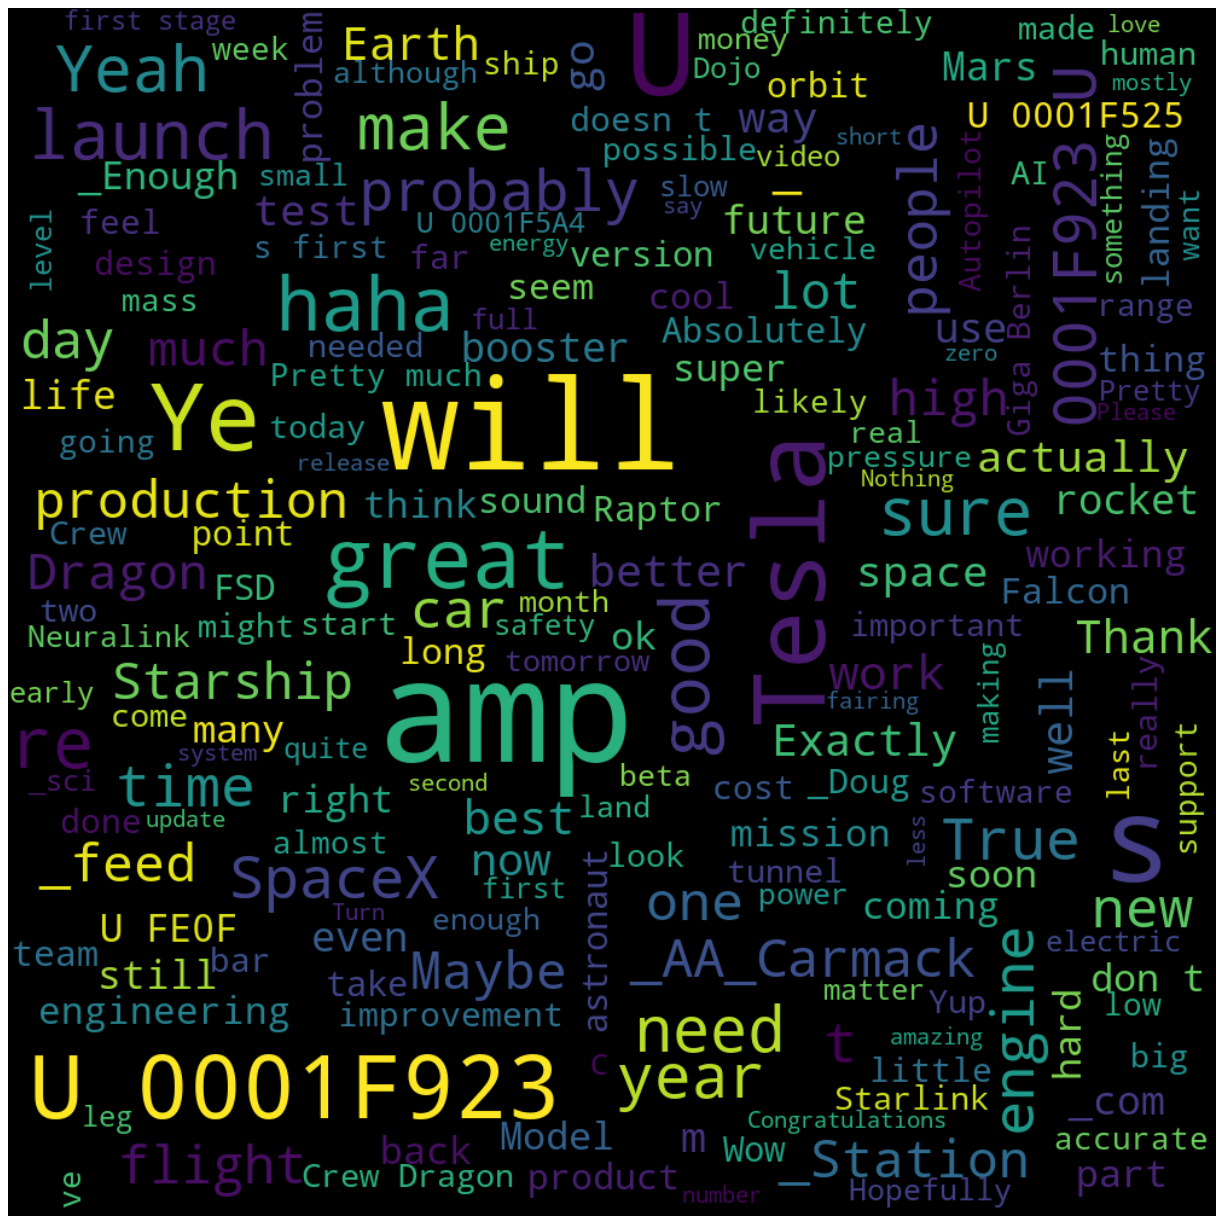

In [19]:
import matplotlib.pyplot as plt
from wordcloud import WordCloud
allwords = " ".join([twts for twts in data["Text"]])
wordCloud = WordCloud(width = 1000, height = 1000, random_state = 21, max_font_size = 119).generate(allwords)
plt.figure(figsize=(20, 20), dpi=80)
plt.imshow(wordCloud, interpolation = "bilinear")
plt.axis("off")
plt.show()

In [20]:
def analysis(score):
    if score < 0:
        return "Negative"
    elif score == 0:
        return "Neutral"
    else:
        return "Positive"

In [21]:
data["analysis"] = data["polarity"].apply(analysis)


In [22]:
data

,Unnamed: 0,Text,subjectivity,polarity,analysis
0,1,Im an alien,0.750000,-0.250000,Negative
1,2,_AA_Carmack Ray tracing on Cyberpunk with HDR ...,0.000000,0.000000,Neutral
2,3,Great interview!,0.750000,1.000000,Positive
3,4,Doge is underestimated,0.000000,0.000000,Neutral
4,5,Congratulations Tesla China for amazing execu...,0.366667,0.345313,Positive
...,...,...,...,...,...
1994,1995,"True, it sounds so surreal, but the negative ...",0.508333,0.111111,Positive
1995,1996,Make sure to read ur terms &amp; conditions b...,0.888889,0.625000,Positive
1996,1997,Samwise Gamgee,0.000000,0.000000,Neutral
1997,1998,Altho Dumb and Dumber is <U+0001F525><U+0001F...,0.500000,-0.375000,Negative


In [24]:
positive_tweets = data[data['analysis'] == 'Positive']
negative_tweets = data[data['analysis'] == 'Negative']

print('positive tweets')
for i, row in positive_tweets[:5].iterrows():
  print(' -' + row['Text'])

print('negative tweets')
for i, row in negative_tweets[:5].iterrows():
  print(' -' + row['Text'])

positive tweets
 -  Great interview!
 - Congratulations Tesla China for amazing execution last year. Now on to the next for even more!!
 -Happy New Year of the Ox! 
 -_   Haha thanks :)
 -The most entertaining outcome is the most likely
negative tweets
 - Im an alien
 - Your app sucks
 - _ Starlink is a staggeringly difficult technical &amp; economic endeavor. However, if we don 
 - _ SpaceX needs to pass through a deep chasm of negative cash flow over the next year or 
 - Everyone at Tesla receives stock. 

My comp is all stock/options, which I do not take off the table. 

Thats what youre missing.


In [26]:
data=data[['Text','analysis']]
data

,Text,analysis
0,Im an alien,Negative
1,_AA_Carmack Ray tracing on Cyberpunk with HDR ...,Neutral
2,Great interview!,Positive
3,Doge is underestimated,Neutral
4,Congratulations Tesla China for amazing execu...,Positive
...,...,...
1994,"True, it sounds so surreal, but the negative ...",Positive
1995,Make sure to read ur terms &amp; conditions b...,Positive
1996,Samwise Gamgee,Neutral
1997,Altho Dumb and Dumber is <U+0001F525><U+0001F...,Negative


In [27]:
train,test = train_test_split(data,test_size=0.1)

In [28]:
train

,Text,analysis
1710,<U+0001F5A4><U+0001F9DB><U+200D><U+2640><U+FE0...,Neutral
377,_ Absolutely,Positive
1637,Apart from failing to quarantine elderly/at-...,Positive
459,"Star Light, Star Bright",Positive
193,"To my surprise, Tesla has better AI hardware ...",Positive
...,...,...
444,,Neutral
831,"Right now, it takes about 5 mins to set up, b...",Positive
449,Bitcoin is my safe word,Positive
1543,Africa is big,Neutral


In [29]:
test

,Text,analysis
825,Closest we got was about a month. The Model...,Negative
1066,"Yes, the Gigafactory is the hardest &amp; m...",Positive
1463,"I tried to warn them, but they just dug their...",Positive
1146,Light is not as fast as youd think,Positive
1111,Vector-space birds eye view coming with FSD,Neutral
...,...,...
62,Thats Damian,Neutral
420,"Yup, were just ironing out a few bugs",Negative
1078,"_ua _Seeley 7 bar absolute, which is fine ...",Positive
463,A t-shirt being better armor than a Kevlar ch...,Positive


In [30]:
for val in train['Text']:
    print (val)

<U+0001F5A4><U+0001F9DB><U+200D><U+2640><U+FE0F>Total Eclipse of the Heart <U+0001F9DB><U+200D><U+2640><U+FE0F><U+0001F5A4> 
_ Absolutely
  Apart from failing to quarantine elderly/at-risk people early (a mistake they recognize), they were right
Star Light, Star Bright 
 To my surprise, Tesla has better AI hardware &amp; software than Waymo (money)
   Yes, but engines have a min throttle point where there is flameout risk, so la 
Fuel header tank pressure was low during landing burn, causing touchdown velocity to be high &amp; RUD, but we got all 
 Definitely not. Smartwatches &amp; phones are yesterdays technology, Neuralinks are the future.
_nafnlaus When Eberhard was fired from the Tesla CEO role in mid 2007 for providing false information to me &amp; t 
_nafnlaus   _Station Reality looks like a strange ghost-world at radar wavelengths. 
 <U+0001F923><U+0001F923>
 <U+0001F5A4>
Starship SN8 with rear body flaps 
: SpaceXs rideshare offering provides increased access to space fo

In [31]:
ps = PorterStemmer()
lemmatizer = WordNetLemmatizer()


In [32]:
pattern = "(#\w+)|(RT\s@\w+:)|(http.*)|(@\w+)"

In [33]:
train['Text']


1710    <U+0001F5A4><U+0001F9DB><U+200D><U+2640><U+FE0...
377                                          _ Absolutely
1637      Apart from failing to quarantine elderly/at-...
459                              Star Light, Star Bright 
193      To my surprise, Tesla has better AI hardware ...
                              ...                        
444                                                      
831      Right now, it takes about 5 mins to set up, b...
449                               Bitcoin is my safe word
1543                                        Africa is big
1203     Genetic engineering is too slow unless you us...
Name: Text, Length: 1799, dtype: object

In [35]:
def Clean_Text(data):
    Text = []
    analysis = []
    for index,row in data.iterrows():
        sentence = re.sub(pattern,'',row.Text)
        words = [e.lower() for e in sentence.split()]
        words = [lemmatizer.lemmatize(word) for word in words if word not in stopwords.words('english')]
        words = ' '.join(words)
        Text.append(words)
        analysis.append(row.analysis)
    return Text,analysis

In [36]:
import nltk
nltk.download('stopwords')

[nltk_data] Downloading package stopwords to
[nltk_data]     C:\Users\Asus\AppData\Roaming\nltk_data...
[nltk_data]   Package stopwords is already up-to-date!


True

In [38]:
import nltk
nltk.download('wordnet')

[nltk_data] Downloading package wordnet to
[nltk_data]     C:\Users\Asus\AppData\Roaming\nltk_data...
[nltk_data]   Unzipping corpora\wordnet.zip.


True

In [39]:
train_Text,train_analysis = Clean_Text(train)

In [40]:
final_data = {'tweets':train_Text,'sentiments':train_analysis}
final_data

{'tweets': ['<u+0001f5a4><u+0001f9db><u+200d><u+2640><u+fe0f>total eclipse heart <u+0001f9db><u+200d><u+2640><u+fe0f><u+0001f5a4>',
  '_ absolutely',
  'apart failing quarantine elderly/at-risk people early (a mistake recognize), right',
  'star light, star bright',
  'surprise, tesla better ai hardware &amp; software waymo (money)',
  'yes, engine min throttle point flameout risk, la',
  'fuel header tank pressure low landing burn, causing touchdown velocity high &amp; rud, got',
  'definitely not. smartwatches &amp; phone yesterday\x92s technology, neuralinks future.',
  '_nafnlaus eberhard fired tesla ceo role mid 2007 providing false information &amp;',
  '_nafnlaus _station reality look like strange ghost-world radar wavelengths.',
  '<u+0001f923><u+0001f923>',
  '<u+0001f5a4>',
  'starship sn8 rear body flap',
  ': spacex\x92s rideshare offering provides increased access space small satellite operator seeking reliable, affordable rid',
  'one way another, excitement guaranteed! s

In [42]:
processed_data = pd.DataFrame(final_data)

In [43]:
processed_data

,tweets,sentiments
0,<u+0001f5a4><u+0001f9db><u+200d><u+2640><u+fe0...,Neutral
1,_ absolutely,Positive
2,apart failing quarantine elderly/at-risk peopl...,Positive
3,"star light, star bright",Positive
4,"surprise, tesla better ai hardware &amp; softw...",Positive
...,...,...
1794,,Neutral
1795,"right now, take 5 min set up, but, future impr...",Positive
1796,bitcoin safe word,Positive
1797,africa big,Neutral


In [44]:
from sklearn.preprocessing import LabelEncoder
labelencoder = LabelEncoder()
processed_data['sentiments'] = labelencoder.fit_transform(processed_data['sentiments'])

In [45]:
processed_data

,tweets,sentiments
0,<u+0001f5a4><u+0001f9db><u+200d><u+2640><u+fe0...,1
1,_ absolutely,2
2,apart failing quarantine elderly/at-risk peopl...,2
3,"star light, star bright",2
4,"surprise, tesla better ai hardware &amp; softw...",2
...,...,...
1794,,1
1795,"right now, take 5 min set up, but, future impr...",2
1796,bitcoin safe word,2
1797,africa big,1


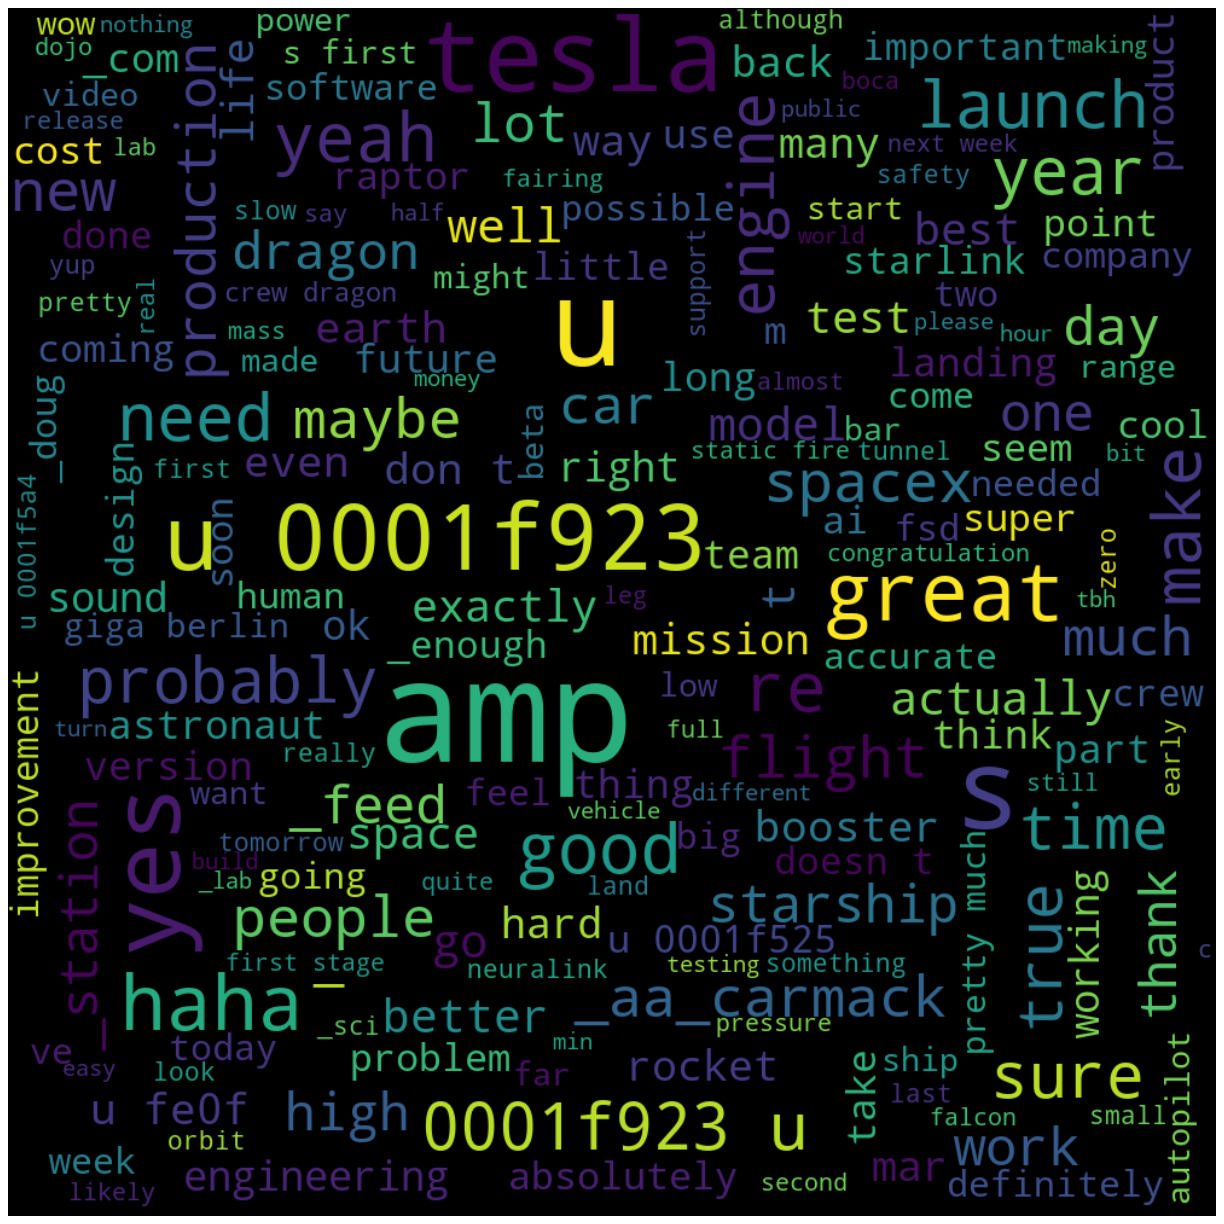

In [46]:
import matplotlib.pyplot as plt
from wordcloud import WordCloud
allwords = " ".join([twts for twts in processed_data["tweets"]])
wordCloud = WordCloud(width = 1000, height = 1000, random_state = 21, max_font_size = 119).generate(allwords)
plt.figure(figsize=(20, 20), dpi=80)
plt.imshow(wordCloud, interpolation = "bilinear")
plt.axis("off")
plt.show()

C:\Users\Asus\anaconda3\lib\site-packages\seaborn\distributions.py:2551: FutureWarning: `distplot` is a deprecated function and will be removed in a future version. Please adapt your code to use either `displot` (a figure-level function with similar flexibility) or `histplot` (an axes-level function for histograms).
  warnings.warn(msg, FutureWarning)


<AxesSubplot:xlabel='sentiments', ylabel='Density'>

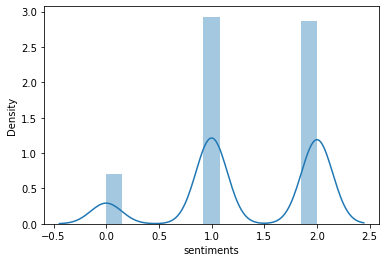

In [47]:
sns.distplot(processed_data['sentiments'])

In [48]:
from sklearn.feature_extraction.text import CountVectorizer
cv = CountVectorizer(ngram_range=(1,3))
cv.fit(processed_data['tweets'])

CountVectorizer(ngram_range=(1, 3))

In [49]:
X_train = cv.transform(processed_data['tweets'])

In [50]:
target = processed_data['sentiments'].values

In [51]:
target

array([1, 2, 2, ..., 2, 1, 0])

In [53]:
from sklearn.naive_bayes import MultinomialNB
classifier = MultinomialNB()

In [54]:
classifier.fit(X_train,target)

MultinomialNB()

In [55]:
test_Text,test_analysis = Clean_Text(test)

In [56]:
data_test = {'tweets':test_Text,'sentiments':test_analysis}
final_test_data = pd.DataFrame(data_test)

In [57]:
final_test_data

,tweets,sentiments
0,closest got month. model 3 ramp extreme stress...,Negative
1,"yes, gigafactory hardest &amp; critical product",Positive
2,"tried warn them, dug grave twice fast!",Positive
3,light fast youd think,Positive
4,vector-space birds eye view coming fsd,Neutral
...,...,...
195,thats damian,Neutral
196,"yup, were ironing bug",Negative
197,"_ua _seeley 7 bar absolute, fine",Positive
198,t-shirt better armor kevlar chest plate doesn...,Positive


In [58]:
X_test = cv.transform(final_test_data['tweets'])

In [59]:
y_pred = classifier.predict(X_test)
y_pred

array([2, 1, 2, 2, 1, 1, 2, 2, 2, 2, 2, 2, 2, 2, 1, 1, 2, 2, 2, 1, 2, 2,
       2, 1, 2, 2, 2, 1, 1, 1, 1, 2, 1, 1, 2, 2, 1, 2, 1, 2, 2, 1, 1, 1,
       2, 2, 1, 2, 1, 2, 2, 2, 1, 2, 2, 2, 2, 2, 1, 1, 2, 2, 2, 2, 2, 1,
       1, 2, 1, 2, 2, 1, 1, 2, 1, 2, 2, 2, 2, 2, 2, 2, 2, 1, 1, 1, 2, 1,
       2, 2, 2, 1, 2, 2, 2, 2, 2, 1, 1, 2, 1, 2, 2, 2, 2, 2, 2, 2, 1, 2,
       2, 1, 2, 1, 1, 1, 2, 2, 2, 1, 1, 2, 2, 2, 2, 1, 2, 2, 1, 2, 2, 1,
       2, 1, 2, 2, 2, 2, 2, 2, 2, 2, 1, 2, 1, 1, 1, 2, 2, 1, 2, 2, 2, 2,
       2, 1, 1, 2, 1, 1, 1, 1, 2, 2, 2, 2, 2, 1, 1, 2, 2, 2, 2, 1, 1, 1,
       2, 2, 1, 2, 2, 1, 2, 2, 1, 1, 1, 2, 1, 1, 2, 1, 1, 2, 2, 2, 2, 2,
       2, 2])

In [60]:
final_test_data['sentiments'] = labelencoder.fit_transform(final_test_data['sentiments'])

In [61]:
final_test_data

,tweets,sentiments
0,closest got month. model 3 ramp extreme stress...,0
1,"yes, gigafactory hardest &amp; critical product",2
2,"tried warn them, dug grave twice fast!",2
3,light fast youd think,2
4,vector-space birds eye view coming fsd,1
...,...,...
195,thats damian,1
196,"yup, were ironing bug",0
197,"_ua _seeley 7 bar absolute, fine",2
198,t-shirt better armor kevlar chest plate doesn...,2


In [62]:
actual_values = final_test_data['sentiments'].values

In [63]:
actual_values

array([0, 2, 2, 2, 1, 1, 0, 2, 2, 0, 2, 2, 2, 2, 2, 1, 1, 1, 1, 1, 2, 0,
       2, 2, 2, 2, 1, 1, 1, 1, 0, 1, 0, 1, 2, 2, 1, 1, 1, 2, 1, 1, 1, 0,
       0, 2, 1, 2, 1, 2, 1, 2, 1, 2, 1, 2, 2, 2, 2, 0, 1, 1, 2, 2, 2, 1,
       1, 2, 1, 2, 2, 1, 0, 2, 1, 2, 1, 2, 1, 0, 1, 2, 2, 1, 1, 0, 1, 2,
       0, 2, 1, 1, 2, 2, 2, 1, 2, 1, 2, 2, 1, 1, 1, 2, 2, 2, 2, 0, 1, 2,
       2, 1, 1, 2, 2, 1, 2, 0, 2, 1, 1, 2, 1, 2, 2, 1, 2, 2, 0, 2, 2, 1,
       1, 1, 2, 2, 0, 2, 2, 1, 1, 2, 1, 1, 1, 1, 1, 0, 0, 1, 2, 2, 2, 0,
       2, 1, 1, 2, 1, 1, 1, 1, 2, 2, 2, 2, 1, 1, 2, 2, 1, 0, 2, 1, 0, 1,
       1, 2, 0, 2, 2, 1, 2, 1, 1, 1, 1, 2, 1, 1, 1, 1, 1, 2, 2, 1, 0, 2,
       2, 2])

In [64]:
from sklearn.metrics import accuracy_score
print(accuracy_score(y_pred, actual_values))

0.68
